In [1]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold, 
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# Clustering algorithms
from sklearn.cluster import KMeans

# Fine-tuning 
# import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

import pandas as pd
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil

2024-01-16 11:07:42.370118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
### follows this example CNN from scratch notebook 
#https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch
seed = 123
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'


def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images

def plot_images_list(images, title, subtitle):
    '''
    This functions helps to plot a matrix of images in a list
    '''
    fig = sp.make_subplots(rows=3, cols=3)
    images = image_resizer(images)
    
    traces = []
    for i in range(min(9, len(images))):
        img = go.Image(z=images[i])
        traces.append((img, i//3+1, i%3+1))
        
    fig.add_traces([trace[0] for trace in traces],
                  rows = [trace[1] for trace in traces],
                  cols = [trace[2] for trace in traces])

    fig.update_layout(
        title={'text': f'<b>{title}<br>  <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
        height=800,
        width=800,
        margin=dict(t=110, l=80),
        plot_bgcolor=bg_color,paper_bgcolor=paper_color
        #template=template
    )
    fig.show()



In [4]:
def balance_dataset(X, y):
    # Separate the data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    # Sample an equal number of samples from each class
    num_samples_per_class = min(len(class_0_indices), len(class_1_indices))

    # Randomly sample indices for each class
    sampled_indices_class_0 = np.random.choice(class_0_indices, num_samples_per_class, replace=False)
    sampled_indices_class_1 = np.random.choice(class_1_indices, num_samples_per_class, replace=False)

    # Combine the sampled indices
    sampled_indices = np.concatenate([sampled_indices_class_0, sampled_indices_class_1])

    # Use the sampled indices to create the balanced training set
    X_balanced = X[sampled_indices]
    y_balanced = y[sampled_indices]
    
    # Check the balance in y_train_balanced
    print(np.bincount(y_balanced))

    return(X_balanced, y_balanced)

In [5]:
image_dir = '/home/smmrrr/Fog_Imaging_Project/sta_221/all_surfline_photos/'

image_summary = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_new_labels.csv')

In [6]:
image_summary

,photo,Label_new,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,0,0.220805,0.285012,0.099900,0.065638,0.106588,...,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722,0
1,2022_07-04.0000_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,0,0.725298,0.720047,0.691137,0.493167,0.477681,...,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307,0
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,7,0.096299,0.131353,0.173731,0.015461,0.041110,...,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465,0
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,7,0.101561,0.205493,0.325304,0.016175,0.091502,...,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268,0
4,2022_07-04.0730_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,7,0.251876,0.576411,0.588961,0.082378,0.292454,...,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,19,0.176457,0.743293,0.523022,0.083535,0.457137,...,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,not_foggy,Cannon Beach,19,0.164592,0.585149,0.640644,0.042335,0.314184,...,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,20,0.282921,0.442290,0.345411,0.136875,0.235093,...,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,20,0.193967,0.582705,0.378667,0.059283,0.307785,...,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,0


In [16]:
# image_summary=image_summary.loc[image_summary['Label'].isin(['not_foggy','foggy'])].reset_index(drop=True)
# image_summary['Label_train'] = 1*(image_summary['Label']=='foggy')


In [7]:
image_summary['Label_train'].value_counts()

0    6981
1    1015
Name: Label_train, dtype: int64

In [10]:
1015/6981

0.14539464260134652

In [8]:
####train test split
X = np.array(image_summary.photo)
y = np.array(image_summary.Label_train)

X_balanced , y_balanced = balance_dataset(X,y)

X_train, X_test_validate, y_train, y_test_validate = train_test_split(
        X_balanced, y_balanced, test_size=0.20, random_state=42, stratify = y_balanced)

X_test, X_validate, y_test, y_validate = train_test_split(
        X_test_validate, y_test_validate, test_size=0.25, random_state=42, stratify = y_test_validate)


[1015 1015]


In [25]:
1776+1776
2841+533+178

3552

In [22]:
len(y_balanced)

3552

In [9]:
print('Xs', ' ', len(X_train), len(X_test), len(X_validate))
print('ys', ' ', len(y_train), len(y_test), len(y_validate))

Xs   1624 304 102
ys   1624 304 102


In [21]:
for i in range(len(X_train)):
    photo_path = image_dir+X_train[i]
    if y_train[i] == 1:
        cnn_path = '/home/smmrrr/Fog_Imaging_Project/cnn_images/train/foggy/'+X_train[i]
    else:
        cnn_path =  '/home/smmrrr/Fog_Imaging_Project/cnn_images/train/not_foggy/'+X_train[i]
    shutil.copy(photo_path,cnn_path )

for i in range(len(X_test)):
    photo_path = image_dir+X_test[i]
    if y_test[i] == 1:
        cnn_path = '/home/smmrrr/Fog_Imaging_Project/cnn_images/test/foggy/'+X_test[i]
    else:
        cnn_path =  '/home/smmrrr/Fog_Imaging_Project/cnn_images/test/not_foggy/'+X_test[i]
    shutil.copy(photo_path,cnn_path )


In [22]:

for i in range(len(X_validate)):
    photo_path = image_dir+X_validate[i]
    if y_validate[i] == 1:
        cnn_path = '/home/smmrrr/Fog_Imaging_Project/cnn_images/validation/foggy/'+X_validate[i]
    else:
        cnn_path =  '/home/smmrrr/Fog_Imaging_Project/cnn_images/validation/not_foggy/'+X_validate[i]
    shutil.copy(photo_path,cnn_path )


In [10]:
test_dir = '/home/smmrrr/Fog_Imaging_Project/cnn_images/test/'
train_dir = '/home/smmrrr/Fog_Imaging_Project/cnn_images/train/'
val_dir = '/home/smmrrr/Fog_Imaging_Project/cnn_images/validation/'

In [11]:
# train_foggy_dir = train_dir + "/" + 'foggy'
# train_not_foggy_dir = train_dir + "/" + 'not_foggy'
# foggy_files = random.sample(os.listdir(train_foggy_dir), 9)
# not_foggy_files = random.sample(os.listdir(train_not_foggy_dir), 9)
# foggy_images = [os.path.join(train_foggy_dir, f) for f in foggy_files]
# plot_images_list(foggy_images, "Foggy", "Training Dataset")


In [12]:

# not_foggy_images = [os.path.join(train_not_foggy_dir, f) for f in not_foggy_files]
# plot_images_list(not_foggy_images, "Not Foggy", "Training Dataset")



In [26]:
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['foggy', 'not_foggy'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)


Found 1624 files belonging to 2 classes.


In [27]:
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['foggy', 'not_foggy'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)


Found 304 files belonging to 2 classes.


In [28]:
validation = tf.keras.utils.image_dataset_from_directory(
    val_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['foggy', 'not_foggy'],
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)


Found 102 files belonging to 2 classes.


In [29]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Testing Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Validation Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [32]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in validation:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)



Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [31]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1
# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y)) 
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [33]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),
        
        
        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),
        
        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

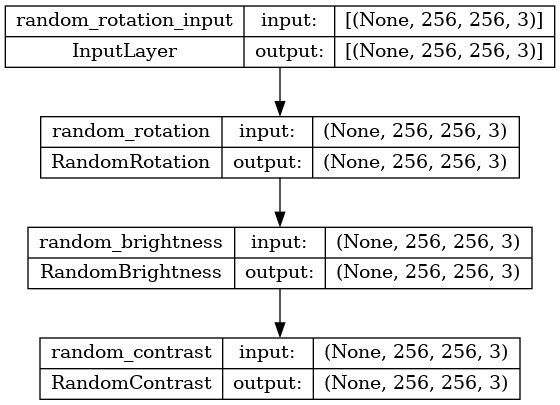

In [34]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)


In [35]:
strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [36]:
# Initiating model on GPU
with strategy.scope():
    model = Sequential()

    model.add(augmentation) # Adding data augmentation pipeline to the model

    # Feature Learning Layers
    model.add(Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input. 
                    input_shape = (256,256,3) # Input image shape
                    ))
    model.add(Activation('relu'))# Activation function
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    # Flattening tensors
    model.add(Flatten())

    # Fully-Connected Layers
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(2, activation = 'softmax')) # Classification layer



In [46]:
!pip install pydot

In [37]:
from keras.utils import plot_model
plot_model(model, to_file='/home/smmrrr/Fog_Image_Data/Fog_Project_Code/cnn_model.png'
           , show_shapes=True, show_layer_names=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [38]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'binary_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric


In [39]:
# Defining an Early Stopping and Model Checkpoints
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 10, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint('best_model.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)


In [ ]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 50,
        validation_data = test,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)



Epoch 1/50
102/102 [==============================] - 170s 2s/step - loss: 2.2086 - accuracy: 0.7217 - val_loss: 1.6668 - val_accuracy: 0.5000
Epoch 2/50
102/102 [==============================] - 165s 2s/step - loss: 0.9257 - accuracy: 0.8036 - val_loss: 0.4989 - val_accuracy: 0.8322
Epoch 3/50
102/102 [==============================] - 164s 2s/step - loss: 0.6351 - accuracy: 0.8097 - val_loss: 0.4376 - val_accuracy: 0.8322
Epoch 4/50
102/102 [==============================] - 162s 2s/step - loss: 0.5796 - accuracy: 0.8190 - val_loss: 0.8616 - val_accuracy: 0.5395
Epoch 5/50
102/102 [==============================] - 161s 2s/step - loss: 0.4605 - accuracy: 0.8584 - val_loss: 0.5704 - val_accuracy: 0.8257
Epoch 6/50
102/102 [==============================] - 162s 2s/step - loss: 0.4641 - accuracy: 0.8522 - val_loss: 0.2696 - val_accuracy: 0.9112
Epoch 7/50
102/102 [==============================] - 161s 2s/step - loss: 0.4633 - accuracy: 0.8510 - val_loss: 0.3565 - val_accuracy: 0.8783

In [13]:
# # Creating subplot
# fig = make_subplots(rows=1,
#                     cols=2,
#                     subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
#                     horizontal_spacing=0.2)

# # Loss over epochs
# train_loss = go.Scatter(x=list(range(len(history.history['loss']))),
#                         y=history.history['loss'],
#                         mode='lines',
#                         line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
#                         name='Training',
#                         showlegend = False)

# val_loss = go.Scatter(x=list(range(len(history.history['val_loss']))),
#                       y=history.history['val_loss'],
#                       mode='lines',
#                       line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
#                       name='Test',
#                       showlegend = False)


# fig.add_trace(train_loss, row=1, col=1)
# fig.add_trace(val_loss, row=1, col=1)

# # Accuray over epochs
# train_acc = go.Scatter(x=list(range(len(history.history['accuracy']))),
#                        y=history.history['accuracy'],
#                        mode='lines',
#                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
#                        name='Training',
#                        showlegend = True)
# val_acc = go.Scatter(x=list(range(len(history.history['val_accuracy']))),
#                      y=history.history['val_accuracy'],
#                      mode='lines',
#                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
#                      name='Test',
#                      showlegend = True)


# fig.add_trace(train_acc, row=1, col=2)
# fig.add_trace(val_acc, row=1, col=2)

# # Updating layout
# # fig.update_layout(
# #     title={'text': '<b>Loss and Accuracy Over Epochs of </b>', 'x': 0.025, 'xanchor': 'left'},
# #     margin=dict(t=100),
# #     plot_bgcolor=bg_color,paper_bgcolor=paper_color,
# #     height=500, width=1000,
# #     showlegend= True
# # )

# fig.update_yaxes(title_text = 'Loss', row = 1, col = 1)
# fig.update_yaxes(title_text = 'Accuracy', row = 1, col = 2)

# fig.update_xaxes(title_text = 'Epoch', row = 1, col = 1)
# fig.update_xaxes(title_text = 'Epoch', row = 1, col = 2)

# # Showing figure
# fig.show()



In [65]:
preds = model.predict(validation)  # Running model on the validation dataset
val_loss, val_acc = model.evaluate(validation) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')



12/12 [==============================] - 4s 267ms/step - loss: 0.2891 - accuracy: 0.9101

Validation Loss:  0.28912627696990967

Validation Accuracy:  91.0 %


In [75]:
validation

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [70]:


# Loading best weights
model.load_weights('best_model.h5')
preds = model.predict(test)  # Running model on the validation dataset
val_loss, val_acc = model.evaluate(test) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')




34/34 [==============================] - 10s 281ms/step - loss: 0.4947 - accuracy: 0.8518

Validation Loss:  0.4947003722190857

Validation Accuracy:  85.0 %


In [74]:
# Display additional metrics
y_pred = model.predict(validation)
y_pred_test = (y_pred > 0.5).astype(int)

y_pred_test

12/12 [==============================] - 4s 270ms/step


array([[0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0,

In [71]:
# Display additional metrics
y_pred = model.predict(validation)
y_pred_test = (y_pred > 0.5).astype(int)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)




12/12 [==============================] - 3s 260ms/step


NameError: name 'y_test' is not defined

In [ ]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


